In [1]:
import sys; import matplotlib.pyplot as plt; import numpy as np
import xarray as xr; import pandas as pd;
  
# adding my module folders to the system path
sys.path.insert(0, '/media/mydrive/PhysOc/DataFinder/')
import PISTON_Data 

sys.path.insert(0, '/media/mydrive/PhysOc/modview/modview/')
import timetools

In [2]:
SSH = xr.open_dataset('/media/mydrive/PISTON/Remote sensing/duacs-rep-global-allsat-phy-l4_20182019.nc')

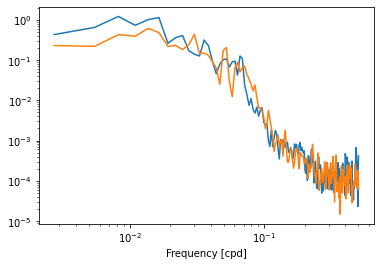

In [3]:
atmoor = SSH.sel(longitude=134.7, latitude=12.3, method='nearest')
atmoor
uhspec = timetools.spectrum(atmoor['ugos'].values, 1, 3);
vhspec = timetools.spectrum(atmoor['vgos'].values, 1, 3);
plt.loglog(uhspec['freqs'],uhspec['spectrum'], label='ugos');
plt.loglog(vhspec['freqs'],vhspec['spectrum'],label='vgos')
plt.xlabel('Frequency [cpd]');


In [4]:
atmoor['ugos'].values

array([-9.110e-02, -1.029e-01, -7.300e-02, -5.890e-02, -4.770e-02,
       -4.260e-02, -4.800e-02, -5.190e-02, -3.190e-02, -9.800e-03,
       -1.460e-02, -1.870e-02, -5.510e-02, -7.930e-02, -1.071e-01,
       -1.164e-01, -1.658e-01, -1.967e-01, -2.236e-01, -2.593e-01,
       -2.904e-01, -2.919e-01, -2.663e-01, -2.643e-01, -2.133e-01,
       -1.789e-01, -1.362e-01, -7.920e-02, -3.300e-03,  3.200e-02,
        3.040e-02,  3.860e-02,  1.000e-02, -6.900e-03, -3.250e-02,
       -4.520e-02, -7.370e-02, -7.670e-02, -8.910e-02, -9.590e-02,
       -1.300e-01, -1.572e-01, -2.234e-01, -2.644e-01, -3.051e-01,
       -3.310e-01, -3.155e-01, -3.419e-01, -3.285e-01, -2.821e-01,
       -2.806e-01, -2.193e-01, -1.663e-01, -1.356e-01, -1.227e-01,
       -1.134e-01, -1.022e-01, -8.500e-02, -8.780e-02, -9.200e-02,
       -1.108e-01, -1.043e-01, -1.045e-01, -1.034e-01, -1.138e-01,
       -8.820e-02, -6.270e-02, -5.690e-02, -4.440e-02, -4.150e-02,
       -5.680e-02, -1.085e-01, -1.461e-01, -1.989e-01, -2.449e

In [5]:
SIO1 = PISTON_Data.Mooring('SIO1');
SIO3 = PISTON_Data.Mooring('SIO3');

In [6]:
velmap = plt.get_cmap('seismic',20)
slomap = plt.get_cmap('bwr',20)

In [7]:
def plotfiltered(dataarr, variable, frads, filt_type):
    # apply a frequency filter to variable in a xr.dataarray

    t1 = pd.to_datetime(dataarr.time.values[1]); 
    t0 = pd.to_datetime(dataarr.time.values[0]);
    dt_obs = t1-t0; 
    dt_obs = 1/dt_obs.total_seconds(); # sampling interval
    
    # remove nans
    nancheck = np.isnan(dataarr[variable].values);
    var2plot = timetools.xpass( np.nan_to_num(dataarr[variable].values, nan=0),
                frads,dt_obs, filt_type);
    var2plot[nancheck] = np.nan;
    return var2plot

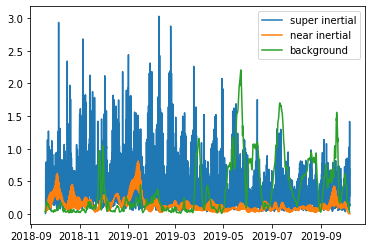

In [8]:
nearf1 = timetools.nearf(12.3);
NIspd = plotfiltered(SIO1.uvT.sel(depth=slice(100,600)),'v',nearf1,'bandpass')**2 \
        + plotfiltered(SIO1.uvT.sel(depth=slice(100,600)),'v',nearf1,'bandpass')**2; 

slospd = plotfiltered(SIO1.uvT.sel(depth=slice(100,600)),'v',nearf1[0],'low')**2 \
        + plotfiltered(SIO1.uvT.sel(depth=slice(100,600)),'v',nearf1[0],'low')**2; 

fastspd = plotfiltered(SIO1.uvT.sel(depth=slice(100,600)),'v',nearf1[1],'high')**2 \
        + plotfiltered(SIO1.uvT.sel(depth=slice(100,600)),'v',nearf1[1],'high')**2; 

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=[6,4]);
#axes.plot( SIO1.uvT.time, (SIO1.uvT['v'].sel(depth=slice(100,600))**2).sum(dim='depth'))
axes.plot( SIO1.uvT.time, np.nansum(fastspd, axis=0),label='super inertial')
axes.plot( SIO1.uvT.time, np.nansum(NIspd, axis=0),label='near inertial')
axes.plot( SIO1.uvT.time, np.nansum(slospd, axis=0),label='background')
plt.legend()

AttributeError: 'AxesSubplot' object has no attribute 'suptitle'

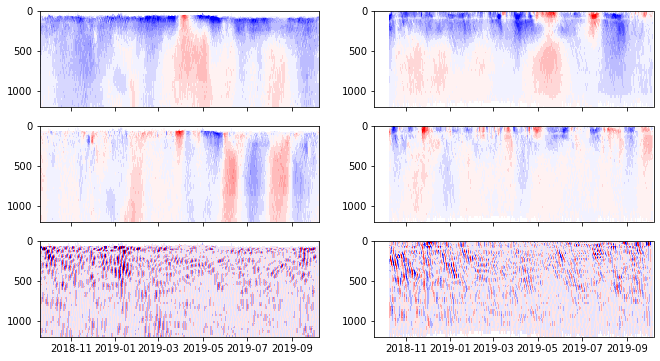

In [9]:
nearf1 = timetools.nearf(12.3);
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=[11,6], sharex=True);

# -------- Southern mooring: SIO1 -----------
axes[0,0].pcolormesh( SIO1.uvT.time, SIO1.uvT.depth, 
                     plotfiltered(SIO1.uvT,'u',nearf1[0],'low'),
                  vmin=-0.4, vmax=0.4, cmap=slomap, shading='auto');
axes[0,0].set_ylim((1200,0))

axes[1,0].pcolormesh( SIO1.uvT.time, SIO1.uvT.depth, 
                     plotfiltered(SIO1.uvT,'v',nearf1[0],'low'),
                  vmin=-0.4, vmax=0.4, cmap=slomap, shading='auto');
axes[1,0].set_ylim((1200,0))

axes[2,0].pcolormesh( SIO1.uvT.time, SIO1.uvT.depth, 
                     plotfiltered(SIO1.uvT,'v',nearf1,'bandpass'),
                  vmin=-0.25, vmax=0.25, cmap=velmap, shading='auto'); 
axes[2,0].set_ylim((1200,0))

# -------- Northern mooring: SIO3 -----------
nearf1 = timetools.nearf(15.7);
axes[0,1].pcolormesh( SIO3.uvT.time, SIO3.uvT.depth, 
                     plotfiltered(SIO3.uvT,'u',nearf1[0],'low'),
                  vmin=-0.4, vmax=0.4, cmap=slomap, shading='auto');
axes[0,1].set_ylim((1200,0))

axes[1,1].pcolormesh( SIO3.uvT.time, SIO3.uvT.depth, 
                     plotfiltered(SIO3.uvT,'v',nearf1[0],'low'),
                  vmin=-0.4, vmax=0.4, cmap=slomap, shading='auto');
axes[1,1].set_ylim((1200,0))

axes[2,1].pcolormesh( SIO3.uvT.time, SIO3.uvT.depth, 
                     plotfiltered(SIO3.uvT,'v',nearf1,'bandpass'),
                  vmin=-0.25, vmax=0.25, cmap=velmap, shading='auto'); 
axes[2,1].set_ylim((1200,0)); axes[2,1].suptitle('near-f')

In [ ]:
# Begin by plotting all mooring data
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=[11,6], sharex=True);

axes[0,0].pcolormesh( SIO1.uvT.time, SIO1.uvT.depth, SIO1.uvT['u'],
                  vmin=-0.5, vmax=0.5, cmap=velmap, shading='auto'); axes[0,0].set_ylim((1200,0))
axes[1,0].pcolormesh( SIO1.uvT.time, SIO1.uvT.depth, SIO1.uvT['v'],
                  vmin=-0.5, vmax=0.5, cmap=velmap, shading='auto'); axes[1,0].set_ylim((1200,0))
axes[2,0].pcolormesh( SIO1.uvT.time, SIO1.uvT.depth, SIO1.uvT['T'],
                  cmap='viridis', shading='auto'); axes[2,0].set_ylim((600,0))

axes[0,1].pcolormesh( SIO3.uvT.time, SIO3.uvT.depth, SIO3.uvT['u'],
                  vmin=-0.5, vmax=0.5, cmap=velmap, shading='auto'); axes[0,1].set_ylim((1200,0))
axes[1,1].pcolormesh( SIO3.uvT.time, SIO3.uvT.depth, SIO3.uvT['v'],
                  vmin=-0.5, vmax=0.5, cmap=velmap, shading='auto'); axes[1,1].set_ylim((1200,0))
axes[2,1].pcolormesh( SIO3.uvT.time, SIO3.uvT.depth, SIO3.uvT['T'],
                  cmap='viridis', shading='auto'); axes[2,1].set_ylim((600,0))

In [ ]:
t0 = pd.to_datetime(SIO1.uvT.time.values[0])
t1 = pd.to_datetime(SIO1.uvT.time.values[1])
cake = t1-t0
print(cake.total_seconds())

In [ ]:
SIO1.uvT